# Importing the libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import f1_score

In [3]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Loading the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [6]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks'

In [7]:
 df_cmu = pd.read_csv('/content/drive/MyDrive/booksummaries_tosend.txt', sep='\t', header=None)

In [8]:
df_cmu

,0,1,2,3,4,5,6
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...
...,...,...,...,...,...,...,...
18626,36934824,/m/0m0p0hr,Under Wildwood,Colin Meloy,2012-09-25,NaN,"Prue McKeel, having rescued her brother from ..."
18627,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",The reader first meets Rapp while he is doing...
18628,37122323,/m/0n5236t,Decoded,Jay-Z,2010-11-16,"{""/m/0xdf"": ""Autobiography""}",The book follows very rough chronological ord...
18629,37132319,/m/0n4bqb1,America Again: Re-becoming The Greatness We Ne...,Stephen Colbert,2012-10-02,NaN,Colbert addresses topics including Wall Stree...


# Data Pre-processing

In [9]:
# rename columns
df_cmu = df_cmu.rename(columns={0:"id_wikipedia", 1:'id_freebase', 2:'title', 3:'author', 4:'pub_date', 5:'genre', 6:'summary'})
df_cmu.head()

,id_wikipedia,id_freebase,title,author,pub_date,genre,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


In [10]:
df_cmu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18631 entries, 0 to 18630
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_wikipedia  18631 non-null  int64 
 1   id_freebase   18631 non-null  object
 2   title         18631 non-null  object
 3   author        16081 non-null  object
 4   pub_date      12376 non-null  object
 5   genre         14612 non-null  object
 6   summary       18630 non-null  object
dtypes: int64(1), object(6)
memory usage: 1019.0+ KB


In [11]:
df_cmu.iloc[1,5]

'{"/m/06n90": "Science Fiction", "/m/0l67h": "Novella", "/m/014dfn": "Speculative fiction", "/m/0c082": "Utopian and dystopian fiction", "/m/06nbt": "Satire", "/m/02xlf": "Fiction"}'

In [12]:
# Converting genre into comma-separated string
def extract_genre(d):
    output = ''
    if pd.isna(d):
        return
    for genre in eval(d).values():
        output = output + genre + ', '
    output = output[:-2]
    return output

#extract_genre(df_cmu['genre'][0])
df_cmu['genre'] = df_cmu['genre'].apply(extract_genre)
df_cmu.head()

,id_wikipedia,id_freebase,title,author,pub_date,genre,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"Roman à clef, Satire, Children's literature, S...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"Science Fiction, Novella, Speculative fiction,...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"Existentialism, Fiction, Absurdist fiction, Novel",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,None,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"Hard science fiction, Science Fiction, Specula...",The novel posits that space around the Milky ...


In [13]:
# Drop books missing genre list
df_cmu = df_cmu[df_cmu['genre'].notna()]
df_cmu.head()

,id_wikipedia,id_freebase,title,author,pub_date,genre,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"Roman à clef, Satire, Children's literature, S...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"Science Fiction, Novella, Speculative fiction,...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"Existentialism, Fiction, Absurdist fiction, Novel",The text of The Plague is divided into five p...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"Hard science fiction, Science Fiction, Specula...",The novel posits that space around the Milky ...
5,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"War novel, Roman à clef","The book tells the story of Paul Bäumer, a Ge..."


In [14]:
df_cmu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14612 entries, 0 to 18630
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_wikipedia  14612 non-null  int64 
 1   id_freebase   14612 non-null  object
 2   title         14612 non-null  object
 3   author        13769 non-null  object
 4   pub_date      10993 non-null  object
 5   genre         14612 non-null  object
 6   summary       14612 non-null  object
dtypes: int64(1), object(6)
memory usage: 913.2+ KB


In [15]:
# Generate numeric publication year
df_cmu['pub_year'] = df_cmu['pub_date'].str.slice(0,4).astype('Int32')

In [16]:
# Tag books with the same author & title
df_cmu['dup'] = df_cmu[['title', 'author']].duplicated(keep=False)

df_cmu.loc[(df_cmu['dup']==True) & (pd.isnull(df_cmu['author'])),'dup'] = False

# Concatenate summaries for duplicates of same book
df_cmu.loc[df_cmu['dup']==True, 'summary'] = df_cmu.loc[df_cmu['dup']==True].groupby('title')['summary'].transform("sum")

# Remove 'helper' variables and reorder columns
df_cmu = df_cmu[["id_wikipedia", 'id_freebase', 'title','author', 'pub_year', 'genre', 'summary']]

In [17]:
df_cmu = df_cmu.reset_index(drop=True)
df_cmu['genre'] = df_cmu['genre'].str.strip() # remove leading and trailing spaces
df_cmu['genre'] = df_cmu['genre'].str.lower() # lower case
df_cmu

,id_wikipedia,id_freebase,title,author,pub_year,genre,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945,"roman à clef, satire, children's literature, s...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"science fiction, novella, speculative fiction,...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"existentialism, fiction, absurdist fiction, novel",The text of The Plague is divided into five p...
3,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,<NA>,"hard science fiction, science fiction, specula...",The novel posits that space around the Milky ...
4,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929,"war novel, roman à clef","The book tells the story of Paul Bäumer, a Ge..."
...,...,...,...,...,...,...,...
14607,36372465,/m/02vqwsp,The Third Lynx,Timothy Zahn,2007,science fiction,The story starts with former government agent...
14608,36534061,/m/072y44,Remote Control,Andy McNab,1997,"thriller, fiction, suspense",The series follows the character of Nick Ston...
14609,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000,"thriller, fiction",The reader first meets Rapp while he is doing...
14610,37122323,/m/0n5236t,Decoded,Jay-Z,2010,autobiography,The book follows very rough chronological ord...


In [18]:
# df_cmu[df_cmu.duplicated(subset=['title', 'author'], keep=False)] #check duplicates

In [19]:
# df of unique genre

def comma_to_df(s):
  val = s.split(",")
  df_s = pd.DataFrame(val, columns=["genre"])
  return df_s
#comma_to_df(df_cmu["genre"][0])

genre_df = pd.DataFrame()
for g in df_cmu["genre"]:
  genre_df = pd.concat([genre_df, comma_to_df(g)])

In [20]:
genre_df = genre_df.reset_index(drop=True)
genre_df['genre'] = genre_df['genre'].str.strip() # remove leading and trailing spaces
genre_df = pd.DataFrame(genre_df.value_counts()).reset_index() #counts
genre_df.rename(columns= {0:"occurence"}, inplace=True)


In [21]:
list(df_cmu[df_cmu["genre"].str.contains("speculative")]["genre"])

["roman à clef, satire, children's literature, speculative fiction, fiction",
 'science fiction, novella, speculative fiction, utopian and dystopian fiction, satire, fiction',
 'hard science fiction, science fiction, speculative fiction, fantasy, fiction',
 "children's literature, fantasy, speculative fiction, bildungsroman, fiction",
 'science fiction, speculative fiction',
 'science fiction, speculative fiction',
 'speculative fiction, fiction, novel',
 "science fiction, speculative fiction, children's literature, fiction",
 "science fiction, speculative fiction, children's literature, fiction",
 'science fiction, speculative fiction, horror, invasion literature, mystery, epistolary novel, fantasy, fiction, gothic fiction',
 "science fiction, speculative fiction, children's literature, fiction, novel",
 "children's literature, absurdist fiction, novella, speculative fiction, fantasy, fiction",
 "science fiction, children's literature, speculative fiction, utopian and dystopian fictio

In [22]:
genre_df.to_csv("genre_df.csv")

In [23]:
genre_df[:30] #total 227 genre

,genre,occurence
0,fiction,5521
1,speculative fiction,5108
2,science fiction,3337
3,novel,2780
4,fantasy,2779
5,children's literature,2449
6,mystery,1574
7,young adult literature,913
8,suspense,905
9,crime fiction,838


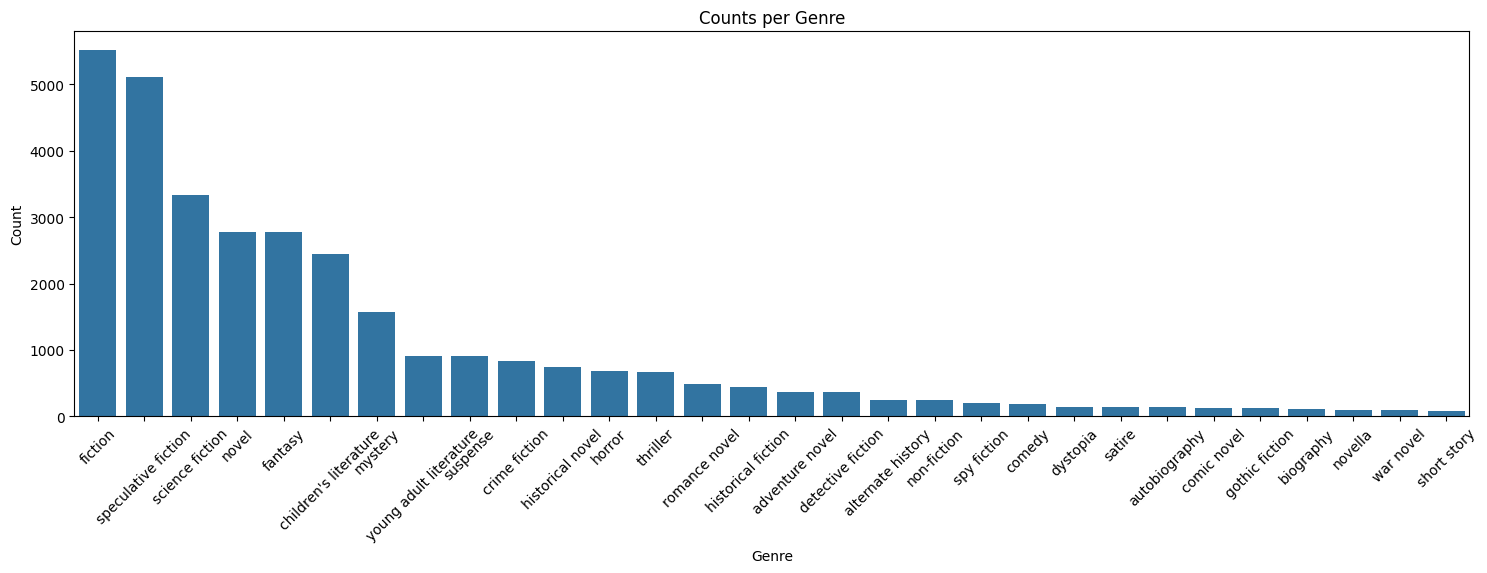

In [24]:
plt.figure(figsize=(18,5))
sns.barplot(x='genre', y='occurence', data=genre_df[:30]) #top 30 genre
plt.title("Counts per Genre")
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [25]:
df_cmu

,id_wikipedia,id_freebase,title,author,pub_year,genre,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945,"roman à clef, satire, children's literature, s...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"science fiction, novella, speculative fiction,...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"existentialism, fiction, absurdist fiction, novel",The text of The Plague is divided into five p...
3,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,<NA>,"hard science fiction, science fiction, specula...",The novel posits that space around the Milky ...
4,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929,"war novel, roman à clef","The book tells the story of Paul Bäumer, a Ge..."
...,...,...,...,...,...,...,...
14607,36372465,/m/02vqwsp,The Third Lynx,Timothy Zahn,2007,science fiction,The story starts with former government agent...
14608,36534061,/m/072y44,Remote Control,Andy McNab,1997,"thriller, fiction, suspense",The series follows the character of Nick Ston...
14609,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000,"thriller, fiction",The reader first meets Rapp while he is doing...
14610,37122323,/m/0n5236t,Decoded,Jay-Z,2010,autobiography,The book follows very rough chronological ord...


In [26]:
# pre-processing the summary column

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower() # lowercase
    text = re.sub(r'[^\w\s]', '', text) # remove punctuation

    words = nltk.word_tokenize(text)
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]

    return filtered_words

In [27]:
df_cmu["summary"] = df_cmu["summary"].apply(clean_text)

In [28]:
df_cmu

,id_wikipedia,id_freebase,title,author,pub_year,genre,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945,"roman à clef, satire, children's literature, s...","[old, major, old, boar, manor, farm, call, ani..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"science fiction, novella, speculative fiction,...","[alex, teenager, living, nearfuture, england, ..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"existentialism, fiction, absurdist fiction, novel","[text, plague, divided, five, part, town, oran..."
3,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,<NA>,"hard science fiction, science fiction, specula...","[novel, posit, space, around, milky, way, divi..."
4,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929,"war novel, roman à clef","[book, tell, story, paul, bäumer, german, sold..."
...,...,...,...,...,...,...,...
14607,36372465,/m/02vqwsp,The Third Lynx,Timothy Zahn,2007,science fiction,"[story, start, former, government, agent, fran..."
14608,36534061,/m/072y44,Remote Control,Andy McNab,1997,"thriller, fiction, suspense","[series, follows, character, nick, stone, exmi..."
14609,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000,"thriller, fiction","[reader, first, meet, rapp, covert, operation,..."
14610,37122323,/m/0n5236t,Decoded,Jay-Z,2010,autobiography,"[book, follows, rough, chronological, order, s..."


In [29]:
## Genre Mapping
genre_mapping = pd.read_excel("/content/drive/MyDrive/genres_mapping_excel.xlsx", sheet_name="genre_mapping")

In [30]:
genre_mapping

,genre,new_genre
0,fiction,fiction
1,speculative fiction,fiction
2,science fiction,fiction
3,fantasy,fiction
4,children's literature,literature
...,...,...
126,medieval romance,romance
127,experimental literature,literature
128,computer science,non-fiction
129,literary theory,literature


In [31]:
genre_mapping_dict = {k:v for k, v in zip(genre_mapping["genre"], genre_mapping["new_genre"])}
#genre_mapping_dict

In [32]:
def clean_labels(row):
    row_labels = row.split(", ")
    final_labels = list()
    for _label in row_labels:
        if _label in genre_mapping_dict:
            final_labels.append(genre_mapping_dict[_label])
    return list(set(final_labels))

In [33]:
df_cmu["filtered_genre"] = df_cmu["genre"].apply(clean_labels)

In [34]:
df_cmu

,id_wikipedia,id_freebase,title,author,pub_year,genre,summary,filtered_genre
0,620,/m/0hhy,Animal Farm,George Orwell,1945,"roman à clef, satire, children's literature, s...","[old, major, old, boar, manor, farm, call, ani...","[literature, fiction, comedy]"
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"science fiction, novella, speculative fiction,...","[alex, teenager, living, nearfuture, england, ...","[short story, fiction, comedy]"
2,986,/m/0ldx,The Plague,Albert Camus,1947,"existentialism, fiction, absurdist fiction, novel","[text, plague, divided, five, part, town, oran...","[non-fiction, fiction]"
3,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,<NA>,"hard science fiction, science fiction, specula...","[novel, posit, space, around, milky, way, divi...",[fiction]
4,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929,"war novel, roman à clef","[book, tell, story, paul, bäumer, german, sold...",[dystopia]
...,...,...,...,...,...,...,...,...
14607,36372465,/m/02vqwsp,The Third Lynx,Timothy Zahn,2007,science fiction,"[story, start, former, government, agent, fran...",[fiction]
14608,36534061,/m/072y44,Remote Control,Andy McNab,1997,"thriller, fiction, suspense","[series, follows, character, nick, stone, exmi...","[thriller, fiction]"
14609,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000,"thriller, fiction","[reader, first, meet, rapp, covert, operation,...","[thriller, fiction]"
14610,37122323,/m/0n5236t,Decoded,Jay-Z,2010,autobiography,"[book, follows, rough, chronological, order, s...",[biography]


In [35]:
df_cmu = df_cmu[df_cmu["filtered_genre"].str.len() != 0]
# df_cmu.reset_index(inplace=True)

In [36]:
df_cmu

,id_wikipedia,id_freebase,title,author,pub_year,genre,summary,filtered_genre
0,620,/m/0hhy,Animal Farm,George Orwell,1945,"roman à clef, satire, children's literature, s...","[old, major, old, boar, manor, farm, call, ani...","[literature, fiction, comedy]"
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"science fiction, novella, speculative fiction,...","[alex, teenager, living, nearfuture, england, ...","[short story, fiction, comedy]"
2,986,/m/0ldx,The Plague,Albert Camus,1947,"existentialism, fiction, absurdist fiction, novel","[text, plague, divided, five, part, town, oran...","[non-fiction, fiction]"
3,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,<NA>,"hard science fiction, science fiction, specula...","[novel, posit, space, around, milky, way, divi...",[fiction]
4,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929,"war novel, roman à clef","[book, tell, story, paul, bäumer, german, sold...",[dystopia]
...,...,...,...,...,...,...,...,...
14607,36372465,/m/02vqwsp,The Third Lynx,Timothy Zahn,2007,science fiction,"[story, start, former, government, agent, fran...",[fiction]
14608,36534061,/m/072y44,Remote Control,Andy McNab,1997,"thriller, fiction, suspense","[series, follows, character, nick, stone, exmi...","[thriller, fiction]"
14609,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000,"thriller, fiction","[reader, first, meet, rapp, covert, operation,...","[thriller, fiction]"
14610,37122323,/m/0n5236t,Decoded,Jay-Z,2010,autobiography,"[book, follows, rough, chronological, order, s...",[biography]


In [37]:
#### 13611 rows

# Word Embeddings



# GloVe

In [38]:
#Pruning rows with less than 5 words in the summary

idx=list() #list of id to keep

for i, row in enumerate(df_cmu.summary):
  if len(row) < 5:
    print(i, row)
  else:
    idx.append(i)

print(idx)

1328 ['plzakochany', 'golem', 'plzakochany', 'golem']
1822 ['plot', 'summary', 'plot', 'summary']
1901 ['receptio', 'receptio']
2284 ['receptio', 'receptio']
2362 ['character', 'character']
3284 ['plot', 'outline', 'description']
4735 ['publication', 'histor']
4872 ['62', '60']
5798 ['plzakochany', 'golem', 'plzakochany', 'golem']
6069 ['plot', 'summary', 'plot', 'summary']
6148 ['receptio', 'receptio']
6307 ['receptio', 'receptio']
6385 ['character', 'character']
6689 ['plot', 'outline', 'description']
6943 ['added']
6948 ['added']
6952 ['added']
8866 ['merchandise']
9594 ['novel', 'tackle', 'theme', 'terrorism']
9758 ['plot', 'outline', 'description']
9759 ['plot', 'outline', 'description']
9760 ['plot', 'outline', 'description']
9761 ['plot', 'outline', 'description']
9762 ['plot', 'outline', 'description']
9763 ['plot', 'outline', 'description']
9764 ['plot', 'outline', 'description']
9765 ['plot', 'outline', 'description']
9766 ['plot', 'outline', 'description']
9767 ['plot', 'out

In [39]:
X_red = df_cmu.summary.iloc[idx]
len(X_red)


mask = np.array([i in idx for i in range(len(df_cmu.filtered_genre))])
y_red = df_cmu.filtered_genre[mask]
y_red.shape

(13563,)

In [40]:
# Pre-trained model
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-50")

In [41]:
X_np = list()
for row in X_red:
  embs = list()

  # embs.append(np.zeros(50, ))
  for word in row:
    if word in model:
      embs.append(model[word])
    # else:
      # embs.appen(np.array())
  if len(embs) == 0:
    print(row)
    continue
  X_np.append(np.mean(np.stack(embs), axis=0))
  # break

In [42]:
y_red

0         [literature, fiction, comedy]
1        [short story, fiction, comedy]
2                [non-fiction, fiction]
3                             [fiction]
4                            [dystopia]
                      ...              
14607                         [fiction]
14608               [thriller, fiction]
14609               [thriller, fiction]
14610                       [biography]
14611                         [fiction]
Name: filtered_genre, Length: 13563, dtype: object

In [43]:
X_np = np.stack(X_np)
X_np.shape

(13563, 50)

In [44]:
X_np

array([[ 0.15477686, -0.07459361, -0.1996067 , ..., -0.20248927,
         0.0519965 , -0.05166036],
       [ 0.15006563,  0.11747683, -0.08293852, ..., -0.23113747,
         0.04887383,  0.01314113],
       [ 0.41039038,  0.03063627, -0.1144226 , ..., -0.14178991,
         0.04082883, -0.03685735],
       ...,
       [ 0.47614616,  0.06222482,  0.13412611, ..., -0.06693074,
        -0.0329757 , -0.02164695],
       [ 0.13618617,  0.3320036 , -0.1507993 , ..., -0.07649887,
        -0.07563474,  0.10346764],
       [ 0.24434109,  0.19408932, -0.03507031, ..., -0.20606624,
        -0.0133625 ,  0.04978446]], dtype=float32)

In [45]:
# train test split

train, test = train_test_split(np.arange(len(X_np)), random_state=42, test_size=0.33, shuffle=True)
mlb = MultiLabelBinarizer()

y = mlb.fit_transform(y_red)


X_train = X_np[train]
X_test = X_np[test]
y_train = y[train]
y_test = y[test]

# X_train = train[0]
# y_train = train[1]
# X_train = train.summary
# X_test = test.summary
# y_train = mlb.fit_transform(train.filtered_genre)
# y_test = mlb.transform(test.filtered_genre)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9087, 50)
(4476, 50)
(9087, 11)
(4476, 11)


In [46]:
y_train = y_train[:, [4,6,10]]
y_test = y_test[:, [4,6,10]]

In [47]:
classes = mlb.classes_[[4,6,10]]

# Classifiers

In [48]:
# Random Forest
rf_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(RandomForestClassifier())),
            ])

In [49]:
for category in range(3):
    print('... Processing {}'.format(category))
    print(classes[category])
    rf_pipeline.fit(X_train, y_train[:, category])

    # compute the testing accuracy and F1
    prediction = rf_pipeline.predict(X_test)
    print(prediction.shape)

    print('Test accuracy is {}'.format(accuracy_score(y_test[:, category], prediction)))
    print('Test f1 is {}'.format(f1_score(y_test[:, category], prediction)))

... Processing 0
fiction
(4476,)
Test accuracy is 0.796916890080429
Test f1 is 0.8786867743227011
... Processing 1
literature
(4476,)
Test accuracy is 0.847408400357462
Test f1 is 0.5668991756499683
... Processing 2
thriller
(4476,)
Test accuracy is 0.8445040214477212
Test f1 is 0.614190687361419


In [50]:
## Logistic Regression
logit_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression())),
            ])

In [51]:
for category in range(3):
    print('... Processing {}'.format(category))
    print(classes[category])
    logit_pipeline.fit(X_train, y_train[:, category])
    # compute the testing accuracy
    prediction = logit_pipeline.predict(X_test)
    print(prediction.shape)
    # mask = y_test[][0]

    print('Test accuracy is {}'.format(accuracy_score(y_test[:, category], prediction)))
    print('Test f1 is {}'.format(f1_score(y_test[:, category], prediction)))

... Processing 0
fiction
(4476,)
Test accuracy is 0.7625111706881144
Test f1 is 0.8616425875309124
... Processing 1
literature
(4476,)
Test accuracy is 0.8170241286863271
Test f1 is 0.4799999999999999
... Processing 2
thriller
(4476,)
Test accuracy is 0.8208221626452189
Test f1 is 0.5598243688254665


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
